# Fowl Escapades - Southern African Bird Call Audio Identification  
---

This is an old Datascience challenge proposed by [Zindi](https://zindi.africa/). It mights be a little incomplete but it could be interesting as an example showing how to deal with audio files.

# 1.Introduction 

### Description
Southern Africa is home to around 960 bird species, some of which are found nowhere else on the globe. These creatures fill many important ecosystem niches, and can be found in every habitat in the region, from the lush Afromontane forests of the Drakensberg to the shifting dunes of the Kalahari. Unfortunately, some species are under threat due to habitat loss, climate change or disease. It is important to monitor the health of bird populations across the region, both for the conservation of the birds themselves and as a key indicator of overall ecosystem health.

Unlike larger animals, birds can be hard to observe with camera traps, and so most monitoring efforts involve volunteers identifying birds in the wild or tagging birds caught in nets before releasing them. The objective of this competition is to create a model capable of identifying birds by their calls. This could enable automatic identification of birds based on audio collected by remote microphones, drastically reducing the human input required for population monitoring.

To keep things simple, this competition focus on 40 birds whose calls are frequently heard in Southern Africa. The training data consists of 1857 audio files, recorded by hundreds of contributors and shared through [xeno-canto](https://www.xeno-canto.org/). The goal is to use these recordings to build a classification model able to predict which bird is calling in a given audio clip.

*Southern Africa is the area south of the Zambezi, Kunene and Okavango rivers. This includes Namibia, Botswana, Zimbabwe, South Africa, Lesotho, Swaziland and southern and central Mozambique.

### Dataset

The data consists of mp3 files with unique IDs as file names, split into train and test sets and available as zip files in the downloads section. The labels for the training set are contained in train.csv, corresponding to one of the 40 species of bird listed below. Your task is to predict the labels for the test set, following the format in sample_submission.csv.

In cases where more than one species is calling (many recordings contain faint background noise) the labels correspond to the most prominent call, and your predictions should do likewise.

We are grateful to the many citizen scientists and researchers who shared the recordings which made this competition possible. The full list of authors can be found on the Zindi web site or in the file of the challenge (authors.csv).

Files available:

- __Train.csv__ - has the common name of the bird and corresponding unique mp3 ID for the training files.
- __Test.csv__ - has the unique mp3 IDs you will be testing your model on.
SampleSubmission.csv - is an example of what your submission file should look like. The order of the rows does not matter, but the names of the mp3 must be correct. Your submission should contain probabilities that the mp3 is of each species (with values between 0 and 1 inclusive).
- __Train.zip__ - mp3 files with unique IDs. Common names of the birds are in Train.csv. You will use these files to train your model. 1857 files.
- __Test.zip__ - mp3 files with unique IDs. You will use these files to test your model and predict the common name of the main bird in each recording. 911 files.
- __StarterNotebook.ipynb__ - Credits to [Johnowhitaker](https://zindi.africa/users/Johnowhitaker) for this starter notebook  and few tips ! 

Visualizations of some of the bird sounds you will encounter in this challenge.

![Visualizations of some of the bird sounds you will encounter in this challenge.](viz.png "Visualizations of some of the bird sounds you will encounter in this challenge.")

Some of these recordings are under a Creative Commons Attribution-NonCommercial-NoDerivs 2.5 license, meaning that you cannot sell or distribute modified copies of the calls. If you would like to share example calls, please download them directly from [xeno-canto](https://www.xeno-canto.org/) and give proper attribution to the author.

## Evaluation metric
The evaluation metric for this challenge is Log Loss.

Some files contain more than one bird call, the goal is to predict the ‘foreground species’ calling the loudest. In the model, one will want to account for background noise.
There are 40 classes (birds). Values should be probabilities and can be between 0 and 1 inclusive.



---
# 2.Audio Feature Extraction in Python
Different type of audio features and how to extract them.


Audio files cannot be understood directly by the models. We need to convert them into an understandable format : this is where feature extraction is important. It is a process that converts most of the data but into an understandable way. Audio feature extraction is required for all the data science tasks such as classification, prediction and recommendation algorithms.

Here is a summary of [this blog post](https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d)

The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.
![alt text](audio_signal_3d.jpeg "Title")


Generate features:  
There are many ways to tackle this challenge. Try deep learning on the audio, generate a spectrogram and treat this as an image classification task, use some signal processing tricks to look for close matches, try to extract meaningful features such as dominant frequencies.... It's up to you :)

 shows how to visualize different properties of the waveform, and some features you could use.

For this example, I'll generate a square spectrogram and save as an image file - not a very elegant approach but let's see where it gets us.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Import all the needed libraries, we’ll be using librosa for analyzing and extracting features of an audio signal. For playing audio we will use pyAudio so that we can play music on a jupyter notebook directly.

In [ ]:
import pandas as pd
import numpy as np

import IPython.display as ipd
from matplotlib import pyplot as plt
import seaborn as sns

import librosa # package for music and audio processing, & features extraction 
import os, shutil, glob

Set the path

In [ ]:
path_colab = 'drive/My Drive/zindi/'
path_jupyt = './'

# set to True with colab or False with jupyter
colab = False
path = path_colab if colab else path_jupyt

## Data insights & look at the submission 

In [ ]:
sub = pd.read_csv(path + 'SampleSubmission.csv')

# retrieve all the class names in a list (the 1st col is the id)
birds = sub.columns[1:]

# add a col with all files' paths 
sub['file_path'] = path + 'Test/' + sub['ID'] + '.mp3'
sub.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,...,White-browed Scrub Robin,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting,file_path
0,019OYB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,./Test/019OYB.mp3
1,01S9OX,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,./Test/01S9OX.mp3
2,02CS12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,./Test/02CS12.mp3
3,02LM3W,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,./Test/02LM3W.mp3
4,0C3A2V,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,./Test/0C3A2V.mp3


Let's listen to a sound in order to know what we get :)

In [ ]:
ipd.Audio(train['file_path'].sample(1).values[0])

There are many different classes of birds:

In [ ]:
nb_class = len(birds)
nb_class

40

The number of recordings are really different from one class to an other:

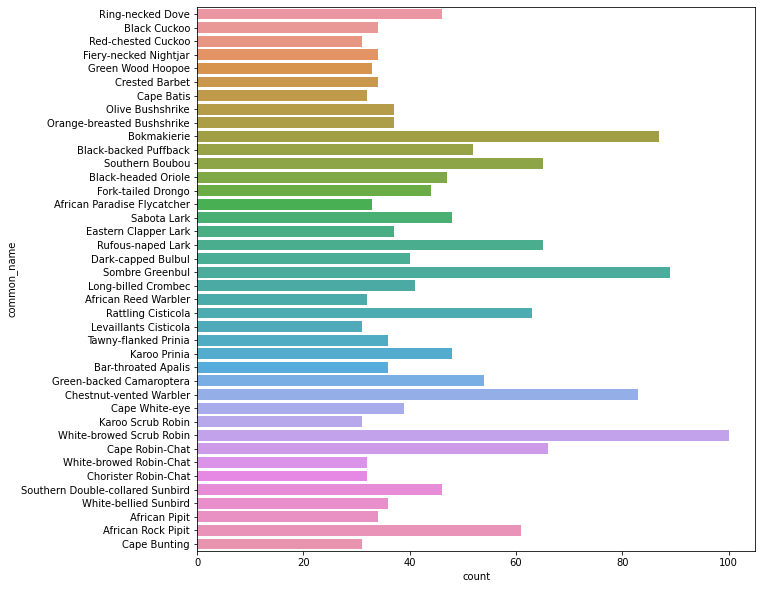

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(y="common_name", data=train)

### Infos on the tracks duration

unlike other challenges in data science, here the number of recordings might not be relevant. Rather we should look at the duration of tracks per classes:

In [29]:
def get_audio_duration(file_path):
    """Load an audio file and returns its duration"""
    y, sr = librosa.load(file_path)
    return librosa.get_duration(y=y, sr=sr)



new_train_csv = path + 'Train_with_duration.csv'
if os.path.isfile(new_train_csv):
    train = pd.read_csv(new_train_csv)
else:
    # tried this but takes a huge amount of time
    # train['duration'] = train['file_path'].apply(lambda x: get_audio_duration(x))
    l = []
    for f in train['file_path'].values:
          y, sr = librosa.load(f)
          l.append(librosa.get_duration(y=y, sr=sr))
    train['duration'] = [round(t) for t in l]
    train.to_csv(new_train_csv)


train.head()

,ID,common_name,file_path,duration
0,MBMG2C,Ring-necked Dove,drive/My Drive/zindi/Train/MBMG2C.mp3,16
1,K8LJSB,Ring-necked Dove,drive/My Drive/zindi/Train/K8LJSB.mp3,12
2,OGD9L6,Ring-necked Dove,drive/My Drive/zindi/Train/OGD9L6.mp3,70
3,581PCQ,Ring-necked Dove,drive/My Drive/zindi/Train/581PCQ.mp3,21
4,P91M1F,Ring-necked Dove,drive/My Drive/zindi/Train/P91M1F.mp3,39


Here is the distribution of the recordings' durations:

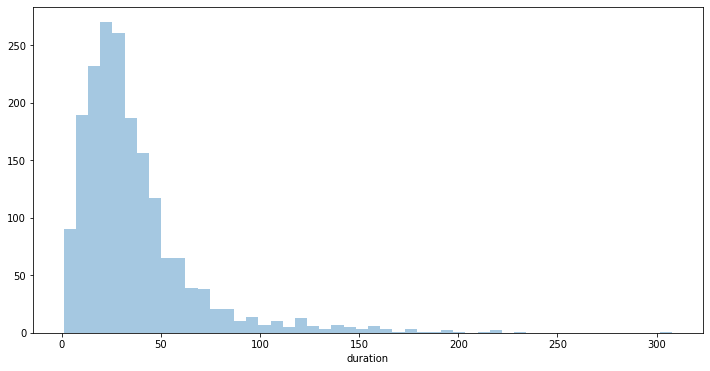

In [37]:
plt.figure(figsize=(12, 6))
sns.distplot(train['duration'], kde=False, rug=False);

Let's see it with boxplots for each class side by side:

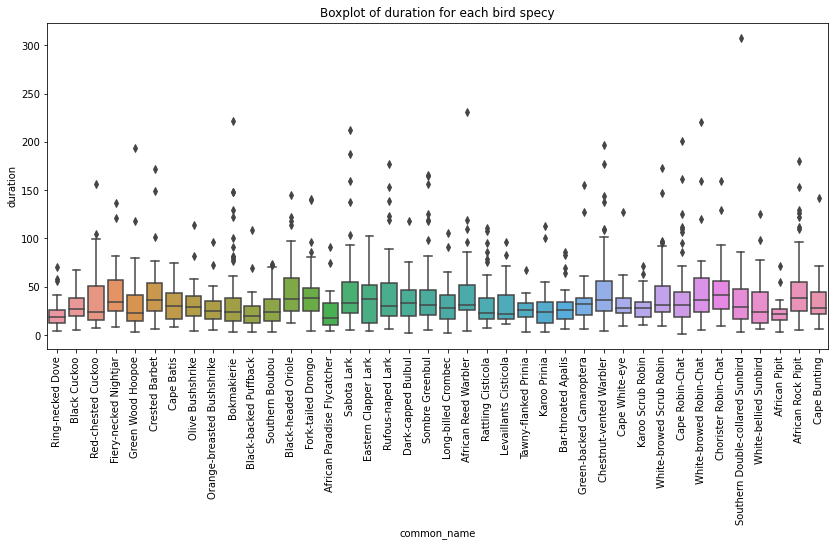

In [41]:
plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
plt.title('Boxplot of duration for each bird specy')
sns.boxplot(x='common_name', y="duration", data=train)   

## Creation of spectrograms

drive/My Drive/zindi/Train/LWN2N9.png


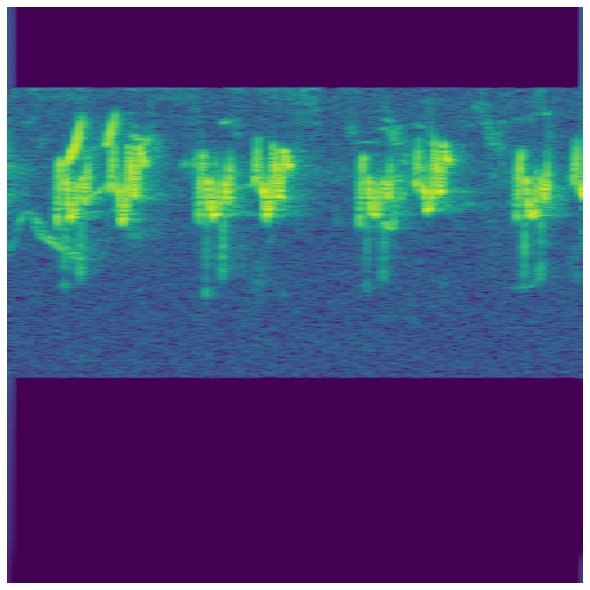

In [ ]:
def gen_spectrogram(path):
    x , sr = librosa.load(path)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X)[:,:min(1025, len(X[0]))])
    fig = plt.figure(frameon=False)
    fig.set_size_inches(8, 8)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(Xdb, aspect='auto')
    fig.savefig(path[:-4]+'.png', dpi=512//8)
    print(path[:-4]+'.png')

gen_spectrogram(train['file_path'].sample(1).values[0])

In [ ]:
for i, pth in enumerate(np.concatenate([train['file_path'].values, sub['file_path'].values])):
    print(i*100//(len(sub)+len(train)), '% done')
    # Check if we've already generated a spectrogram, and if not, make one
    if not os.path.isfile(pth[:-4]+'.png'):
        plt.clf()
        gen_spectrogram(pth)
    ipd.clear_output(wait=True)
    plt.close()

99 % done


In order to be sure that all the audio files has been converted, we've to compare the shape of the dataframe listing all the track, the number of images and finally the number of audio tracks for both the train and the test sets:

In [ ]:
# Checking that the spectrograms were all generated successfully
train.shape[0], len(glob.glob('drive/My Drive/zindi/Train/*.png')), len(glob.glob('drive/My Drive/zindi/Train/*.mp3'))

(1857, 1857, 1857)

In [ ]:
# Same thing for the test folder
sub.shape[0], len(glob.glob('drive/My Drive/zindi/Test/*.mp3')), len(glob.glob('drive/My Drive/zindi/Test/*.png'))

(911, 911, 911)

In [ ]:
# checking scikit learn version since model stacking is available for versions > 0.22
import sklearn
sklearn.__version__

'0.22.2.post1'

### Data Preparation

as usual let's split the dataset:

In [ ]:
from sklearn.model_selection import train_test_split

X, y = train.drop(columns=['file_path', 'common_name']), train.drop(columns=['ID', 'file_path'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.to_csv('drive/My Drive/zindi/x_train.csv')
X_test.to_csv('drive/My Drive/zindi/x_test.csv')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1485, 1), (372, 1), (1485, 1), (372, 1))

We can see the shape of each image:

In [ ]:
img_to_array(load_img(path='drive/My Drive/zindi/Train/00M595.png')).max()

227.0

In [ ]:
input_shape = img_to_array(load_img(path='drive/My Drive/zindi/Train/00M595.png')).shape
input_shape

(512, 512, 3)

# 3. Classification of images with a Convolutional Neural Network

Now that we've converted all the recordings in images of spectrograms, it's modelisation time ! Let's compile a CNN model with TensorFlow.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense
from tensorflow.keras import models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
input_shape = (512, 512, 3)

In [ ]:
def create_model():
    model = Sequential()
    # Layer C1
    model.add(Conv2D(filters=6, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
    # Layer S2
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    # Layer C3
    model.add(Conv2D(filters=10, kernel_size=(3, 3), padding='same', activation='relu'))
    # Layer S4
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    # Before going into layer C5, we flatten our units
    model.add(Flatten())
    # Layer C5
    model.add(Dense(units=512, activation='relu'))
    # Layer F6
    model.add(Dense(units=128, activation='relu'))
    # Output layer
    model.add(Dense(units=nb_class, activation='softmax')) # softmax for multi class
    return model

In [ ]:
model = create_model()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks //
# callbacks = [EarlyStopping(monitor='val_loss', patience=5), TensorBoard(log_dir=path + 'Graph', 
    # histogram_freq=0, write_graph=True, write_images=True)]

Instructions for updating:
Colocations handled automatically by placer.


Here is a full description of all the setting and parameters to generate other images [vijayabhaskar96](https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720)

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,           # normalization
        rotation_range=45,        # a value in degrees (0-180), a range within which to randomly rotate pictures
        width_shift_range=0.2,    # a fraction of total width or height, within which to randomly translate pictures vertically or horizontally
        height_shift_range=0.2,
        shear_range=0.2,          # for randomly applying shearing transformations
        zoom_range=0.2,           # for randomly zooming inside pictures
        horizontal_flip=False,    # for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry
        fill_mode='nearest')      # used for filling in newly created pixels, which can appear after a rotation or a width/height shift

batch_size = 32
target_size=(512, 512)

train_generator = train_datagen.flow_from_directory(
        directory=path + 'Spectrograms_all_classified',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical') # for multi class

Found 1857 images belonging to 40 classes.


[Reference Datascience Stackexchange](https://datascience.stackexchange.com/questions/29719/how-to-set-batch-size-steps-per-epoch-and-validation-steps)

*   batch_size determines the number of samples in each mini batch. Its maximum is the number of all samples, which makes gradient descent accurate, the loss will decrease towards the minimum if the learning rate is small enough, but iterations are slower. Its minimum is 1, resulting in stochastic gradient descent: Fast but the direction of the gradient step is based only on one example, the loss may jump around. batch_size allows to adjust between the two extremes: accurate gradient direction and fast iteration. Also, the maximum value for batch_size may be limited if your model + data set does not fit into the available (GPU) memory.

*   steps_per_epoch the number of batch iterations before a training epoch is considered finished. If you have a training set of fixed size you can ignore it but it may be useful if you have a huge data set or if you are generating random data augmentations on the fly, i.e. if your training set has a (generated) infinite size. If you have the time to go through your whole training data set I recommend to skip this parameter.

*   validation_steps similar to steps_per_epoch but on the validation data set instead on the training data. If you have the time to go through your whole validation data set I recommend to skip this parameter.


model.fit_generator requires the input dataset generator to run infinitely.

steps_per_epoch is used to generate the entire dataset once by calling the generator steps_per_epoch times

whereas epochs give the number of times the model is trained over the entire dataset.

In [ ]:
if not os.path.isfile(path + f'01.spectrograms_all_loop3.h5'):
    for i in range(1, 6):

        # check is file already exists then skip this loop
        if os.path.isfile(path + f'01.spectrograms_all_loop{i}.h5'):
            model.load_weights(path + f'01.spectrograms_all_loop{i}.h5')
            print(f"loading iteration {i}")
            continue

        # otherwise train the model and save it
        model.fit_generator(
            train_generator,
            steps_per_epoch=2000 // batch_size,
            epochs=40)
            #validation_data=validation_generator,
            #validation_steps=800 // batch_size,
            #callbacks=callbacks)

        # Save the model's weights
        model.save(path + f'01.spectrograms_all_loop{i}.h5')
        print(f"saved model nb{i}")
            
else:
    model.load_weights(path + '01.spectrograms_all_loop3.h5')

loading iteration 1
loading iteration 2
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
62/62 [==============================] - 580s 9s/step - loss: 2.2876 - accuracy: 0.3282
Epoch 2/40
62/62 [==============================] - 395s 6s/step - loss: 2.2439 - accuracy: 0.3461
Epoch 3/40
62/62 [==============================] - 389s 6s/step - loss: 2.2072 - accuracy: 0.3349
Epoch 4/40
62/62 [==============================] - 389s 6s/step - loss: 2.2499 - accuracy: 0.3441
Epoch 5/40
62/62 [==============================] - 386s 6s/step - loss: 2.1488 - accuracy: 0.3630
Epoch 6/40
62/62 [==============================] - 384s 6s/step - loss: 2.1667 - accuracy: 0.3702
Epoch 7/40
62/62 [==============================] - 385s 6s/step - loss: 2.1920 - accuracy: 0.3492
Epoch 8/40
62/62 [==============================] - 384s 6s/step - loss: 2.2329 - accuracy: 0.3543
Epoch 9/40
62/62 [==============================] - 384s 6s/step - loss: 2.1570 - accuracy: 

KeyboardInterrupt: ignored

In [ ]:
model.load_weights(path + '01.spectrograms_all_loop3.h5')

In [ ]:
!ls drive/My\ Drive/zindi/Spectrograms_2_Test/Spectrograms_2_Test | wc -l

911


There is a little trick from [kylewbanks](https://kylewbanks.com/blog/loading-unlabeled-images-with-imagedatagenerator-flowfromdirectory-keras) in order to make prediction when you don't have test labelled images

In [ ]:
# There are no labelled test images. In this case, you will have a single test folder which contains all the images that you want to classify.

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
        directory='drive/My Drive/zindi/Spectrograms_2_Test/Spectrograms_2_Test',
        classes=['test'],
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',  # our generator will only yield batches of data, no labels
        shuffle=False)  # preserve the order of filenames and predictions

Found 0 images belonging to 1 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
        directory=path + 'Spectrograms_2_Test/',
        target_size=target_size,
        batch_size=batch_size,
        shuffle=False)

Found 911 images belonging to 1 classes.


In [ ]:
test_generator.reset()

labels = (train_generator.class_indices)

# reorder class labels according to the indices
labels = dict((v,k) for k,v in labels.items())

the predict_generator method returns the output of a model, given a generator that yields batches of numpy data

In [ ]:
def tf_predictions(model, csv_file, sub_df):
    probabilities = model.predict_generator(generator=test_generator, steps=911 // batch_size + 1)
    pred = pd.DataFrame(probabilities, columns=list(labels.values()))

    # Get filenames (set shuffle=false in generator is important)
    filenames = test_generator.filenames
    
    # remove path to keep img or ID name, add it to df
    pred['ID'] = [file_path[20:-4] for file_path in filenames]
    pred.head()
    
    
    # reorder predictions columns in the same way as submission
    try:
        sub_df_temp = sub_df.drop(columns=['len', 'file_path'])
    except:
        pass
    pred = pred[list(sub_df_temp.columns)]
    pred.head()

    
    # check if ID are alphabetically ordered then create the csv file for submission
    col_id = list(pred['ID'].values)
    if col_id == sorted(list(pred['ID'].values)):
        pred.to_csv(path + csv_file, index=False)
    else:
        print("ID aren't alphabetically ordered")

tf_predictions(model, 'submission_iteration_3.csv', sub)

In [ ]:
model.load_weights(path + '01.spectrograms_all_loop3.h5')
tf_predictions(model, 'submission_iteration_1.csv', sub)


submission scores for various iterations of 40 epochs : 
- after 1 iteration(s) on the training data set ie 040 epochs : accuracy  ~27% // submission : log loss on test dataset = 5.317
- after 2 iteration(s) on the training data set ie 080 epochs : accuracy  ~32% // submission : log loss on test dataset = 3.265
- after 3 iteration(s) on the training data set ie 120 epochs : accuracy  ~43% // submission : log loss on test dataset = 8.137


### Let's understand how good are our predictions on the train data set

In [ ]:
train_generator = train_datagen.flow_from_directory(
        directory='../../Spectrograms_1_Train/',
        target_size=target_size,
        batch_size=batch_size,
        shuffle=False)
probabilities = model.predict_generator(generator=train_generator, steps=911 // batch_size + 1)

Found 1857 images belonging to 1 classes.


In [ ]:
y_pred = np.argmax(probabilities, axis=1)
y_pred = [labels[pred] for pred in y_pred]
y_true = train['common_name'].values

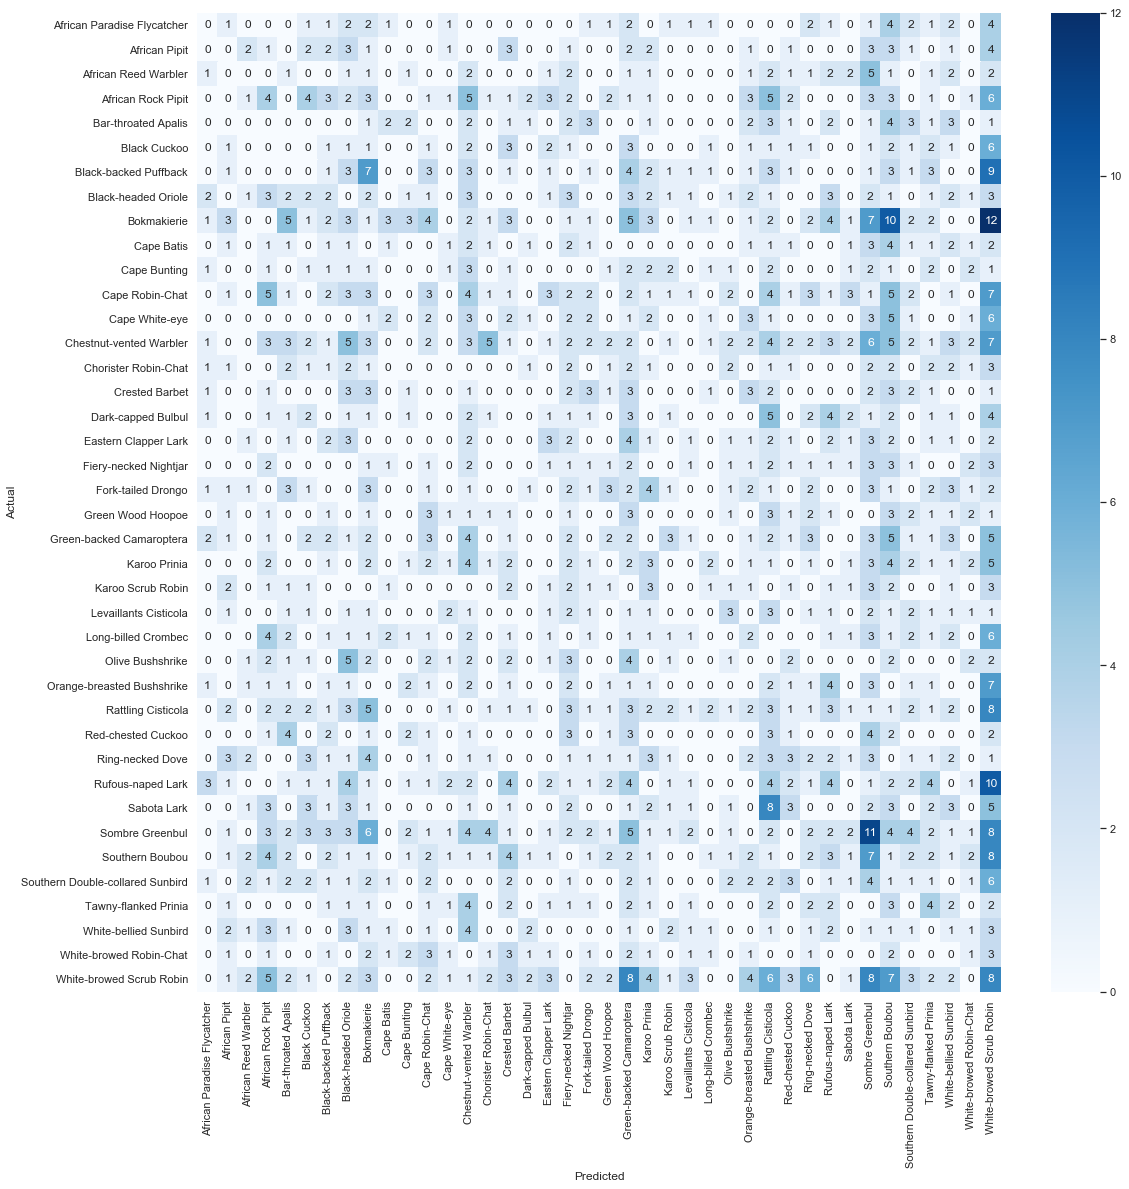

In [ ]:
from sklearn.metrics import confusion_matrix
# since v0.22 sklearn has a specific method to plot confusion matrix

cm = confusion_matrix(y_true, y_pred)

df_cm = pd.DataFrame(cm, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (18, 18))
sns.set(font_scale=1) #for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 12})# font size

## How to improve our model / the results ?

I've tried to make [audio data augmentation](https://medium.com/@keur.plkar/audio-data-augmentation-in-python-a91600613e47) by adding white noise, change a little bit the tempo, cut some part, make loops but unfortunately those options didn't allow my models to perfom better. The best solution relied on a specific & well choosen C.N.N architecture: the winner made a lot of different tries each time with various number of layers / neurons per layer. But here are few other cool ideas you might want to try: 

1) Increase the image size  
2) 'Crop' the inputs, both to show a shorter clip of audio and a smaller frequency range  
3) Experiment with different ways of displaying the spectrogram. Log scale on the frequency axis. More striking colour maps  
4) Maybe some audio cleaning and pre-processing...  
5) Extracting other features: Mel Spectrograms, amplitude plots, various acoustic parameters... there's a whole world of audio-related weirdness you can explore. So you can finally use other type of models than CNN  
6) Boost training data quality by detecting special 'events' in the recordings  
7) Tackle 'background calls': the occasional presence of extra birds calling in the background can have a bad impact  
8) improve your knowledge in the Signal Processing area (the fourier domain etc...)  
9) Look around to see what the State of the Art is for audio classification  


# References:

- [Extraction of features of music](https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d)
- [Audio voice processing with Deep Learnin](https://www.analyticsvidhya.com/blog/2017/08/audio-voice-processing-deep-learning/)
- [Audio feature extraction and clustering](https://www.kaggle.com/humblediscipulus/audio-feature-extraction-and-clustering) 
- [K means audio](https://github.com/AakashMallik/audio_signal_clustering/blob/master/K_means_audio.ipynb)    
- [Music genre classification with Python](https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8)
- [Music genre classification with Python - Github repo](https://github.com/parulnith/Music-Genre-Classification-with-Python)
- [Music information retrieval (imho a great site for audio manipulation!)](https://musicinformationretrieval.com/)